## Defining Different Activation Function
1. Hardlim
2. Satlin
3. Sigmoid
4. Relu
5. Leaky Relu
6. Tanh
7. Sigmoid

In [27]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 05 09:28:05 2018

@author: Ashish Jha
"""
#Importing Libraries
import numpy as np
import pandas as od
import matplotlib.pyplot as plt
import sklearn 
from math import *

#Implementation of Different Activation function
def hardlim(x,k):
    op=0 if x<=k else 1 
    return op
def satlim(x,k):
    if(x<0):
        op=0
    elif x<k:
        op=x
    else:
        op=k
    return op
    
def sigmoid(x):
    return 1/(1+exp(-x))

def tanh(x):
    return (exp(x)-exp(-x))/(exp(x)+exp(-x))

def relu(x):
    op=0 if x<0 else x
    return op

def lrelu(x,a):
    op=a*x if x<0 else x
    return op

def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))

The value of sigmoid is  0.5
The value of hardlim is  1
The value of hardlim is  0
The value of softmax is  [0.0320586  0.08714432 0.23688282 0.64391426]
The value of tanh is  0.0
The value of relu is  4
The value of relu is  0
The value of lrelu is  4
The value of lrelu is  -0.05


### Testing on Different Input

In [28]:
print("The value of sigmoid is ",sigmoid(0))
print("The value of hardlim is ",hardlim(5,4))
print("The value of hardlim is ",hardlim(4,5))
print("The value of softmax is ",softmax([1,2,3,4]))
print("The value of tanh is ",tanh(0))
print("The value of relu is ",relu(4))
print("The value of relu is ",relu(0))
print("The value of lrelu is ",lrelu(4,0.01))
print("The value of lrelu is ",lrelu(-5,0.01))

The value of sigmoid is  0.5
The value of hardlim is  1
The value of hardlim is  0
The value of softmax is  [0.0320586  0.08714432 0.23688282 0.64391426]
The value of tanh is  0.0
The value of relu is  4
The value of relu is  0
The value of lrelu is  4
The value of lrelu is  -0.05


# Plotting the Graph using Pyplot

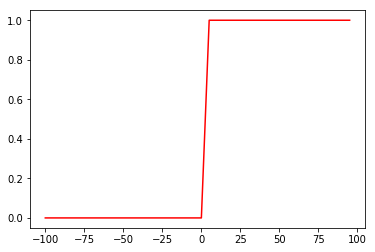

In [29]:
#Plotting Functions
%matplotlib inline
x=list(range(-100,100,5))
yh=[hardlim(t,0) for t in range(-100,100,5)]
ys=[sigmoid(t) for t in range(-100,100,5)]
ysa=[satlim(t,50) for t in range(-100,100,5)]
yt=[tanh (t) for t in range(-100,100,5)]
yr=[relu(t) for t in range(-100,100,5)]
ylr=[lrelu(t,0.01) for t in range(-100,100,5)]

#Hardlim
plt.plot(x,yh,c="red")
#plt.axis([-100, 100, -100, 100])

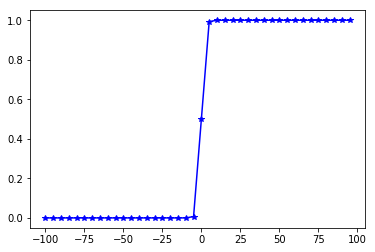

In [30]:
#Sigmoid
plt.plot(x,ys,c="blue",marker="*")
#plt.axis([-100, 100, -1, 1])

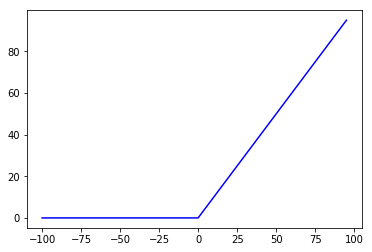

In [31]:
#Relu
plt.plot(x,yr,c="blue")
#plt.axis([-100, 100, -1, 1])

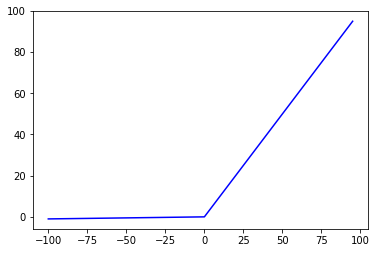

In [32]:
#Leaky Relu
plt.plot(x,ylr,c="blue")
#plt.axis([-100, 100, -1, 1])

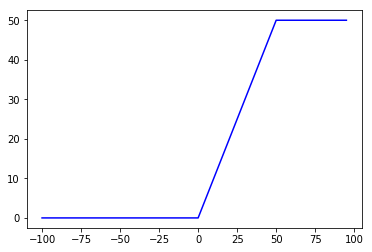

In [33]:
#Satlin
plt.plot(x,ysa,c="blue")

## Classification in Iris Dataset

In [98]:
#Importing Libararies
import numpy as np
import pandas as pd
import sklearn

In [99]:
df=pd.read_csv('iris.csv',names=['sepal length','sepal width','petal length','petal width','class'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [101]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [103]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [126]:
from sklearn.model_selection import train_test_split
X=df[df.columns[:-1]]
y=df['class']
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.6, random_state=69)

4      0
58     1
20     0
114    2
31     0
Name: class, dtype: int32

In [127]:
#Using MLP Classifier
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5), random_state=1,activation='tanh')
clf.fit(X_train, y_train)
print(clf.predict(X_test[:1]),"::::::",y_test[:1])

[0] :::::: 4    0
Name: class, dtype: int32


In [115]:
print('Score on training data', clf.score(X_train,y_train)*100)
print('Score on testing data', clf.score(X_test,y_test)*100)

Score on training data 70.0
Score on testing data 64.44444444444444


In [128]:
#Using SVM Classifier
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print('Score on training data', svc.score(X_train,y_train)*100)
print('Score on testing data', svc.score(X_test,y_test)*100)

Score on training data 96.66666666666667
Score on testing data 98.88888888888889
